In [1]:
# safe divide function to stop zero counts from causing problems. This is zero counts for number of words
# which can happen sometimes when texts are small, texts are empty, or content words are removed from small texts
def safe_divide(a, b): #function calls two arguments. Here it will be a POS count and number of words
    if b != 0: #
        return a/b
    else:
        return 0

In [2]:
import os
# Change to the working directory
os.chdir('/Users/zepedalab/Desktop/MATHia_NLP_YB')

#Lab wd:/Users/zepedalab/Desktop/MATHia_NLP_YB
#Home wd: /Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP

import pandas as pd
import re
import spacy
!python3 -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


/Users/zepedalab/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.5 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#import the dataset
text_df = pd.read_excel('/Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes + partial E2C3.xlsx')

#home wd: /Users/yuchengbao/PycharmProjects/JupyterProject/models/Practice Dataset.xlsx
#lab wd: /Users/zepedalab/Desktop/MATHia_NLP_YB/E1C3 Codes (COMPLETE).xlsx

In [4]:
# pre-process the text data (text_df)
text_df['input'] = text_df['input'].astype(str) # convert the text input to string type
text_df['input'] = text_df['input'].str.lower() # convert the text to lower case

text_df_3 = text_df[text_df['input'].str.len() >= 3] #can adjust the threshold here
short_input_df = text_df[text_df['input'].str.len() < 3]


In [5]:
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
0,stu_NWRXR49435,that i will awaly do better then last time,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
2,stu_KAIDW62100,nan,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
3,stu_KAIDW62100,nan,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
4,stu_KAIDW62100,". jjjnnk.nj..mi,.mk.ki.kii..l.kin.",1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
7,stu_PLFUT13166,nan,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,stu_FPKEK15647,i dont know,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,1,0
760,stu_DTKMN31890,okasadjdbhjf,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
761,stu_RXBXP54597,uhh?...,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
762,stu_YTUKZ68347,nuh uh,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0


In [6]:
short_input_df

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
1,stu_GDLLQ68531,no,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,1,0,0
5,stu_TMJAI99056,nn,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
6,stu_QRVFN34916,e,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
11,stu_VLXIG01010,k,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
13,stu_LHFEX95759,no,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,stu_KSTAJ12370,ff,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
726,stu_VEZXS34998,.,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
728,stu_ONUXX90404,.,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
734,stu_UDVQA26035,no,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,1,0,0


In [7]:
#New method for detecting the nonsense string --- I think I will use this one ultimately
from nostril import nonsense
nonsense_df = pd.DataFrame(columns=text_df_3.columns) # to store the nonsense response
short_text_df = pd.DataFrame(columns=text_df_3.columns) # to store the response that too short to be tested by this model

# Iterate through rows and separate nonsense rows
for index, row in text_df_3.iterrows():
    try:
        text = row['input']

        # Check if the text is too short to test
        if len(text) < 6:
            # Add the short text to short_text_df
            short_text_df = pd.concat([short_text_df, row.to_frame().T], ignore_index=True)
            text_df_3 = text_df_3.drop(index)
            print(f"Row {index}: Text is too short to test")
            continue  # Skip to the next row

        # Use nostril to detect nonsense in the current row's text
        is_nonsense = nonsense(text)  # Assuming 'input' is the column containing the text

        # If the text is nonsense, add it to nonsense_df and remove from text_df_3
        if is_nonsense:
            nonsense_df = pd.concat([nonsense_df, row.to_frame().T], ignore_index=True)
            text_df_3 = text_df_3.drop(index)

        print(row['input'], is_nonsense)  # Print the row and its classification

    except Exception as e:
        print(f"Error processing row {index}: {e}")

that i will awaly do better then last time False
Row 2: Text is too short to test
Row 3: Text is too short to test
. jjjnnk.nj..mi,.mk.ki.kii..l.kin. True
Row 7: Text is too short to test
focus in classs or ask for help in work from the teacher or ask the fellow classmates. False
i am and i was hecking my work and if it didnt make since i would use the hit to help and solve it. False
i motivated myself by thinking about what would happen if i fail. False
less work to do after False
i worked hard and kept going. False
i worked hard and try to get it done False
idk so i can get out of school False
i just took my time and focus False
i just did it. False
keep tring?.. False
one of the many ways that i motivate myself is by saying that it will be ok and i is just a question. False
i motivated myslef by reminding myself that there is reward for hard work. False
i set my goal to something and do it so in the end i can do what i want False
i took my time and focused and didnt get too stressed

In [8]:
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
0,stu_NWRXR49435,that i will awaly do better then last time,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
8,stu_PLFUT13166,focus in classs or ask for help in work from t...,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
9,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
10,stu_PQGNU67655,i motivated myself by thinking about what woul...,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0.0,0,0,0,0
12,stu_CNUDZ97976,less work to do after,0,0,0,0,0,0.0,1,0,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,stu_FPKEK15647,i dont know,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,1,0
760,stu_DTKMN31890,okasadjdbhjf,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
761,stu_RXBXP54597,uhh?...,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
762,stu_YTUKZ68347,nuh uh,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0


In [9]:
#Method 1: detect the gibberish and cross-check with the human labels
#from langdetect import detect_langs

#Method 2: gibberish detector based on training model

from gibberish_detector import detector
#os.chdir('/Users/yuchengbao/Desktop/ALL Lab/MATHia_NLP')
#os.system('gibberish-detector train big.txt > gibberish-detector.model')
Detector = detector.create_from_model('/Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model')
#lab wd: /Users/zepedalab/PycharmProjects/MATHia-NLP-YB/gibberish-detector.model

In [10]:
#using detector to initially test the gibberish
# Create an empty dataframe to store gibberish rows
gibberish_df = pd.DataFrame(columns=text_df_3.columns)

# Iterate through rows and separate gibberish rows
for index, row in text_df_3.iterrows():
    try:
        # Check if the row is gibberish
        is_gibberish = Detector.is_gibberish(row['input'])

        # If it is gibberish, add to the gibberish_df and remove from text_df_3
        if is_gibberish:
            gibberish_df = pd.concat([gibberish_df, row.to_frame().T], ignore_index=True)
            text_df_3 = text_df_3.drop(index)

        print(row['input'], is_gibberish)

    except Exception as e:
        print(f"Error processing row {index}: {e}")


that i will awaly do better then last time False
focus in classs or ask for help in work from the teacher or ask the fellow classmates. False
i am and i was hecking my work and if it didnt make since i would use the hit to help and solve it. False
i motivated myself by thinking about what would happen if i fail. False
less work to do after False
i worked hard and kept going. False
i worked hard and try to get it done False
idk so i can get out of school False
i just took my time and focus False
i just did it. False
keep tring?.. False
one of the many ways that i motivate myself is by saying that it will be ok and i is just a question. False
i motivated myslef by reminding myself that there is reward for hard work. False
i set my goal to something and do it so in the end i can do what i want False
i took my time and focused and didnt get too stressed False
thinking about going outside False
i kept thinking about the grade that i could get in math if i practice. False
write the problem t

In [11]:
gibberish_df

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
0,stu_HMCKN95919,bruhhhh,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
1,sch_NQNWK22810,3434r 34-gt4ktn'q,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
2,sch_HTPUV14121,i jsut did.,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,1,0,0
3,sch_NQNWK22810,bruhhhh,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
4,sch_HTPUV14121,f mudiocgufy,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
5,sch_HTPUV14121,uyfic.kfv.kuf,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
6,sch_UYJKC37038,ajskdd,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
7,stu_APYRC75659,wnshjss,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
8,stu_DTKMN31890,okasadjdbhjf,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
9,stu_RXBXP54597,uhh?...,1,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0


In [12]:
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
0,stu_NWRXR49435,that i will awaly do better then last time,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
8,stu_PLFUT13166,focus in classs or ask for help in work from t...,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
9,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
10,stu_PQGNU67655,i motivated myself by thinking about what woul...,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0.0,0,0,0,0
12,stu_CNUDZ97976,less work to do after,0,0,0,0,0,0.0,1,0,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,stu_DADWI12943,i am doing very good in math,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
756,stu_BZJMI69789,i didnt,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,1,0,0
757,stu_XUMOU81866,just continue to focus and understand the best...,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,0.0,0,0,0,0
759,stu_FPKEK15647,i dont know,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,1,0


In [9]:
%pip install lingua-language-detector
from lingua import Language, LanguageDetectorBuilder

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
#Languag Detector - Method 1:
#lingua import: https://github.com/pemistahl/lingua-py
languages = [Language.ENGLISH,Language.SPANISH]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

# Create an empty dataframe to store non-English rows
non_eng_df = pd.DataFrame(columns=text_df_3.columns)

# Iterate through rows and check for non-English texts (confidence_values = 0)
for index, row in text_df_3.iterrows():
    try:
        # Get the confidence values for the language detection
        confidence_values = detector.compute_language_confidence_values(row['input'])
        # Extract the confidence value for English
        english_confidence = next((cv.value for cv in confidence_values if cv.language == Language.ENGLISH), 0)
        # Check if confidence value for English is 0 (i.e., non-English)
        if english_confidence < 0.7:
            # Add the row to the non_eng_df
            non_eng_df = pd.concat([non_eng_df, row.to_frame().T], ignore_index=True)
            # Remove the row from the original dataframe (if needed)
            #text_df_3 = text_df_3.drop(index)
        #print(row['input'], confidence_values.get(Language.ENGLISH, 0))
    except Exception as e:
        print(f"Error processing row {index}: {e}")

In [59]:
non_eng_df


,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed,Count,Notes
0,stu_KAIDW62100,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
1,stu_KAIDW62100,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
2,stu_PLFUT13166,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
3,stu_ZWFZI88907,i just did it.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,NaN
4,stu_EMFNA59963,enter,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
85,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
86,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
87,sch_NQNWK22810,nan,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [12]:
#generate a new column 'gibberish_detected' to store the gibberish detection results
text_df['gibberish_detected'] = 0  # default column

for index, row in text_df.iterrows():
    try:
        langs = detect_langs(row['input'])

        if len(langs) > 0:
            lang = langs[0].lang
            prob = langs[0].prob

            # Mark as gibberish if not English OR English confidence < threshold
            if langs[0].lang != 'en' and langs[0].prob > 0.8:
                text_df.at[index, 'gibberish_detected'] = 1
            else:
                text_df.at[index, 'gibberish_detected'] = 0
    except:
        text_df.at[index, 'gibberish_detected'] = 1  # Mark as gibberish if detection fails

# compare with human labels
text_df['gibberish_match'] = text_df['gibberish_detected'] == text_df['Invalid Response']
# calculate accuracy
accuracy = text_df['gibberish_match'].mean()
print(f'Gibberish detection accuracy: {accuracy:.2%}')

#pull out the Anon.Student.Id, input, Invalid Response, gibberish_detected, gibberish_match columns for review
text_df_quick_review = text_df[['Anon.Student.Id', 'input', 'Invalid Response', 'gibberish_detected', 'gibberish_match']]

Gibberish detection accuracy: 36.56%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# True labels (from human-coded data)
y_true = text_df['Invalid Response']
# Predicted labels (from your detection code)
y_pred = text_df['gibberish_detected']

# 1️⃣ Accuracy: How many total predictions were correct
accuracy = accuracy_score(y_true, y_pred)

# 2️⃣ Precision (Of the items flagged as gibberish, how many were actually gibberish), Recall (How many actual gibberish cases were caught), F1
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 3️⃣ Full classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=["Valid", "Gibberish"]))

# 4️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\n=== Confusion Matrix ===")
print(cm)

# 5️⃣ Summary output
print(f"\nAccuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

In [14]:
#output the review file
text_df_quick_review.to_excel('/Users/yuchengbao/PycharmProjects/JupyterProject/models/gibberish_detection_review.xlsx', index=False)

In [13]:
text_data_docs = list(nlp.pipe(text_df.input)) #spacy the texts

In [14]:
# preview the text_df
text_df_3

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
0,stu_NWRXR49435,that i will awaly do better then last time,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
8,stu_PLFUT13166,focus in classs or ask for help in work from t...,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
9,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
10,stu_PQGNU67655,i motivated myself by thinking about what woul...,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0.0,0,0,0,0
12,stu_CNUDZ97976,less work to do after,0,0,0,0,0,0.0,1,0,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,stu_DADWI12943,i am doing very good in math,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
756,stu_BZJMI69789,i didnt,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,1,0,0
757,stu_XUMOU81866,just continue to focus and understand the best...,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,0.0,0,0,0,0
759,stu_FPKEK15647,i dont know,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,1,0


After finishing the text-preprocessing, I am going to do the nlp analysis based on the TF-IDF technique

In [15]:
#using the gensim to tokenize the text input for the later NLP analysis
import gensim
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download the wordnet resource if not already done
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zepedalab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Tokenize and lemmatize the documents
tokenized_docs = [
    [lemmatizer.lemmatize(word.lower()) for word in gensim.utils.tokenize(doc)
     if word.lower() not in stop_words and word.isalpha()]
    for doc in text_df_3.input
    if len([word for word in gensim.utils.tokenize(doc) if word.lower() not in stop_words and word.isalpha()]) > 0
]

# Create filtered_docs: Only keep non-empty documents
filtered_docs = [doc for doc in tokenized_docs if len(doc) > 0]

# Filter text_df_3 to remove rows that correspond to empty tokenized documents
# Ensure that text_df_3_filtered matches filtered_docs in length
text_df_3_filtered = text_df_3.iloc[:len(filtered_docs)].reset_index(drop=True)

print(f"Length of filtered_docs: {len(filtered_docs)}")
print(f"Length of text_df_3_filtered: {len(text_df_3_filtered)}")

Length of filtered_docs: 436
Length of text_df_3_filtered: 436


In [17]:
filtered_docs
text_df_3_filtered

,Anon.Student.Id,input,Invalid Response,Self-Efficacy,Utility Value,Intrinsic Values (replaced Interest Enhancement),Opportunity cost \n(outside effort cost),Effort,Extrinsic Rewards/ Self-Consequating,Environmental Control,...,Mastery Self-Talk (Approach/Avoidance),Performance Self-Talk (Approach/Avoidance),Fear of Failure,Attention,Willpower,Seeking help from others,Emotion Regulation,Did Not Motivate,I Don't Know,No Strategy Listed
0,stu_NWRXR49435,that i will awaly do better then last time,0,0,0,0,0,0.0,0,0,...,0,1,0,0,0,0.0,0,0,0,0
1,stu_PLFUT13166,focus in classs or ask for help in work from t...,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
2,stu_VRMMP96431,i am and i was hecking my work and if it didnt...,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0
3,stu_PQGNU67655,i motivated myself by thinking about what woul...,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0.0,0,0,0,0
4,stu_CNUDZ97976,less work to do after,0,0,0,0,0,0.0,1,0,...,0,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,stu_LYWIV98419,i motivated myself by telling myself i will ge...,0,0,0,0,0,0.0,0,0,...,0,0,0,1,0,0.0,0,0,0,0
432,stu_QGXWH16443,"i know that if i dont work hard, i wont be suc...",0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0.0,0,0,0,0
433,stu_QYQRV68179,i motivated my self by belving in my self.,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,0.0,0,0,0,0
434,stu_JJDDS61509,i really likes this it really helped me for wh...,0,0,1,1,0,0.0,0,0,...,0,0,0,0,0,0.0,0,0,0,0


In [18]:
# create empty dictionary from gensim library (for the vocabulary)
dictionary = gensim.corpora.Dictionary()
# iteratively add each doc to the bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in filtered_docs]

print(len(bow_corpus)) #338 texts
print(len(dictionary)) #440 words

436
655


In [19]:
for doc in bow_corpus:
    print([[dictionary[id], freq] for id, freq in doc])

print(len(dictionary)) #530

[['awaly', 1], ['better', 1], ['last', 1], ['time', 1]]
[['ask', 2], ['class', 1], ['classmate', 1], ['fellow', 1], ['focus', 1], ['help', 1], ['teacher', 1], ['work', 1]]
[['help', 1], ['work', 1], ['didnt', 1], ['hecking', 1], ['hit', 1], ['make', 1], ['since', 1], ['solve', 1], ['use', 1], ['would', 1]]
[['would', 1], ['fail', 1], ['happen', 1], ['motivated', 1], ['thinking', 1]]
[['work', 1], ['less', 1]]
[['going', 1], ['hard', 1], ['kept', 1], ['worked', 1]]
[['hard', 1], ['worked', 1], ['done', 1], ['get', 1], ['try', 1]]
[['get', 1], ['idk', 1], ['school', 1]]
[['time', 1], ['focus', 1], ['took', 1]]
[['keep', 1], ['tring', 1]]
[['many', 1], ['motivate', 1], ['ok', 1], ['one', 1], ['question', 1], ['saying', 1], ['way', 1]]
[['work', 1], ['motivated', 1], ['hard', 1], ['myslef', 1], ['reminding', 1], ['reward', 1]]
[['end', 1], ['goal', 1], ['set', 1], ['something', 1], ['want', 1]]
[['time', 1], ['didnt', 1], ['get', 1], ['took', 1], ['focused', 1], ['stressed', 1]]
[['thinkin

In [20]:
import numpy as np

# Get vocab from dictionary
vocab = pd.Series(dictionary.token2id).index

# Sequence of numbers as long as the documents
index = range(len(bow_corpus))

# Create a pandas dataframe full of zeros.
bow_df = pd.DataFrame(data=np.zeros((len(bow_corpus), len(dictionary)), dtype=np.float32),
                  index=index, # row labels
                  columns=vocab) #column labels

# Add each word from the bag-of-words corpus to the matrix.
for idx in index:
  for id, freq in bow_corpus[idx]:
    bow_df.loc[idx,dictionary[id]] = freq
    # updates the specific cell in the DataFrame using by using the document index (row) idx
    # and token ID (column) id, which has been mapped back into the token (word)
    # and sets it to the token's frequency freq

# Transpose the matrix for easy reading
bow_df.T


,0,1,2,3,4,5,6,7,8,9,...,426,427,428,429,430,431,432,433,434,435
awaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
better,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ask,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
motavited,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
went,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
push,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Calculating Inverse Docmengt Frequency

num_documents = len(bow_df) #get the length of the documents
print(num_documents) #this will be six. Note the df is not transposed

# function of idf
def idf(term):
  documents_containing_term = (bow_df[term] > 0).sum()    # sum of documents containing the term
  return np.log(num_documents+1/documents_containing_term+1)  # divide the number of documents by the num documents with the term and get the log.

# dictionary comprehension to apply the idf function to every word (column) in the bow_df DataFrame
idf = pd.Series({term:idf(term) for term in bow_df.columns}) # create dictionary with key value pair of term:idf(term)
idf

436


awaly        6.082219
better       6.080219
last         6.080696
time         6.080141
ask          6.080315
               ...   
motavited    6.082219
unit         6.082219
went         6.082219
push         6.082219
continue     6.082219
Length: 655, dtype: float64

In [22]:
#Calculate Term Frequency

tf_df = bow_df.div(bow_df.sum(axis='columns'), axis='rows') # divide each token count by the total token count for the row.
# sum() method specifies the direction along which the sum is calculated
# axis='columns' indicates that the sum is calculated across the columns for each row
# axis='rows' tells the function to perform the division row-wise

tf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,explaining,enough,pay,sucessful,belving,motavited,unit,went,push,continue
0,0.25,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.00,0.00,0.00,0.00,0.222222,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
432,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
433,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
434,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [23]:
#Calculate the TF-IDF score

tfidf_df = tf_df.copy().multiply(idf, axis='columns')
# make copy of tf_df that is tf/idf

# Transpose it for readability
tfidf_df

,awaly,better,last,time,ask,class,classmate,fellow,focus,help,...,explaining,enough,pay,sucessful,belving,motavited,unit,went,push,continue
0,1.520555,1.520055,1.520174,1.520035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.351181,0.675584,0.675675,0.675802,0.675571,0.675559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.520035,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.520555
434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Machine Learning in Python

In [24]:
print(len(tfidf_df))  # Check number of rows in tfidf_df
print(len(text_df_3_filtered))  # Check number of rows in text_df_3

436
436


Logistic Regression Accuracy (Full Data): 0.8944954128440367
Logistic Regression Precision (Full Data): 0.9014084507042254
Logistic Regression Recall (Full Data): 0.6213592233009708

Classification Report (Full Data):
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       333
           1       0.90      0.62      0.74       103

    accuracy                           0.89       436
   macro avg       0.90      0.80      0.83       436
weighted avg       0.90      0.89      0.89       436



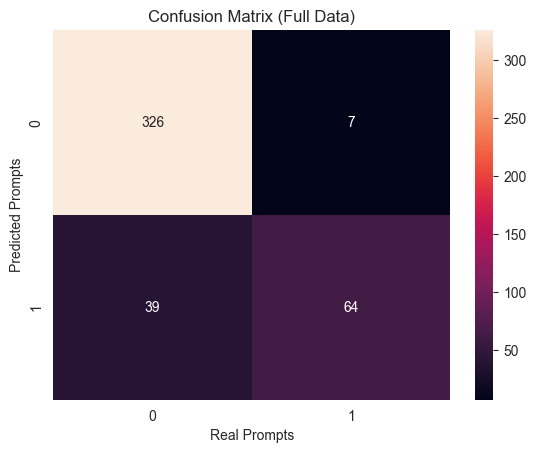

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# train a logistic regression model on the entire dataset
# note, this is not how machine learning works in practice, but I do not want to introduce you to machine learning

# need to remove prompt
all_data_classifier = LogisticRegression()
all_data_classifier.fit(tfidf_df, text_df_3_filtered['Willpower']) # train on the entire tf-idf matrix and prompt data (i.e., 1 or 2)

# predict outcomes on the entire dataset
predicted_all_data = all_data_classifier.predict(tfidf_df)

# E\evaluate the model on the entire dataset
print("Logistic Regression Accuracy (Full Data):", metrics.accuracy_score(text_df_3_filtered['Willpower'], predicted_all_data))
print("Logistic Regression Precision (Full Data):", metrics.precision_score(text_df_3_filtered['Willpower'], predicted_all_data))
print("Logistic Regression Recall (Full Data):", metrics.recall_score(text_df_3_filtered['Willpower'], predicted_all_data))

# classification report and confusion matrix
print("\nClassification Report (Full Data):\n", metrics.classification_report(text_df_3_filtered['Willpower'], predicted_all_data))

import seaborn as sns
import matplotlib.pyplot as plt

cm_full_data = metrics.confusion_matrix(text_df_3_filtered['Willpower'], predicted_all_data)
sns.heatmap(cm_full_data, annot=True, fmt='d')
plt.title('Confusion Matrix (Full Data)')
plt.xlabel('Real Prompts')
plt.ylabel('Predicted Prompts')
plt.show()



Willpower(random drew balanced sample)

Class counts in original data:
Willpower
0    333
1    103
Name: count, dtype: int64

Minority class: 1 with 103 instances
Majority class: 0 with 333 instances

Balanced class counts:
Willpower
1    103
0    103
Name: count, dtype: int64

Logistic Regression Accuracy (Balanced Data): 0.941747572815534
Logistic Regression Precision (Balanced Data): 0.9504950495049505
Logistic Regression Recall (Balanced Data): 0.9320388349514563

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       103
           1       0.95      0.93      0.94       103

    accuracy                           0.94       206
   macro avg       0.94      0.94      0.94       206
weighted avg       0.94      0.94      0.94       206



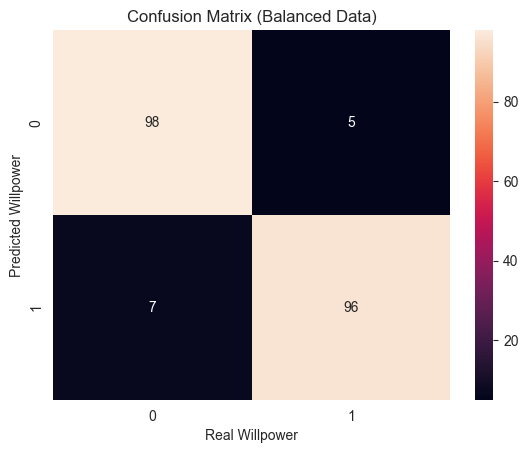

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

# y = labels
y = text_df_3_filtered['Willpower']

# 1. Check class counts
print("Class counts in original data:")
print(y.value_counts())

# 2. Get minority size and indices for each class
class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

print("\nMinority class:", minority_class, "with", n_minority, "instances")
print("Majority class:", majority_class, "with", class_counts.max(), "instances")

# indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority, random_state=1234  # random_state for reproducibility
).index

# 3. Combine indices and build balanced X and y
balanced_idx = minority_idx.union(majority_idx_sampled)
X_bal = tfidf_df.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# optional: shuffle rows so classes are mixed
X_bal, y_bal = shuffle(X_bal, y_bal, random_state= 14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

# 4. Train logistic regression on the balanced dataset
bal_classifier = LogisticRegression()
bal_classifier.fit(X_bal, y_bal)

# Predict on the same balanced dataset (same style as your original analysis)
predicted_bal = bal_classifier.predict(X_bal)

# 5. Evaluate on the balanced dataset
print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# 6. Confusion matrix and heatmap
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('Real Willpower')
plt.ylabel('Predicted Willpower')
plt.show()


Class counts AFTER alignment:
Willpower
0    333
1    103
Name: count, dtype: int64

Minority class: 1 with 103 instances
Majority class: 0 with 333 instances

Balanced class counts:
Willpower
1    103
0    103
Name: count, dtype: int64

Classes in classifier: [0 1]

Logistic Regression Accuracy (Balanced Data): 0.941747572815534
Logistic Regression Precision (Balanced Data): 0.9504950495049505
Logistic Regression Recall (Balanced Data): 0.9320388349514563

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       103
           1       0.95      0.93      0.94       103

    accuracy                           0.94       206
   macro avg       0.94      0.94      0.94       206
weighted avg       0.94      0.94      0.94       206



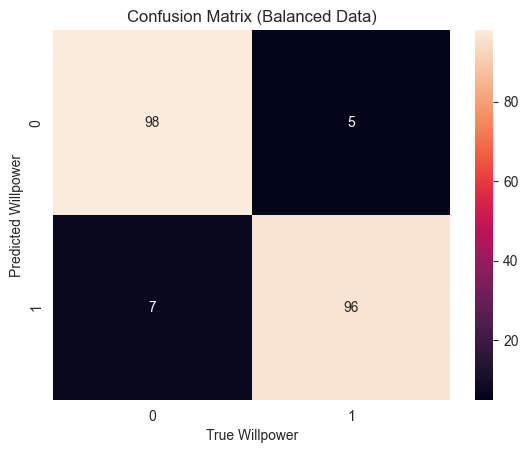


Positive coefficients increase log-odds of class: 1

Top 20 words predicting Willpower = 1 (largest positive coefficients):
           feature  coefficient
270           tell     0.875883
41        question     0.867082
55           could     0.832717
117        knowing     0.796580
191         answer     0.680181
51            want     0.679773
77         reading     0.678598
252           able     0.659099
276       increase     0.639333
198       studying     0.627351
177       everyday     0.621604
571        domwhat     0.583171
554  understanding     0.581008
34            took     0.576060
633          sleep     0.573332
35            keep     0.566301
9             help     0.555545
290            wrk     0.540552
248          tried     0.528565
249     understand     0.506914

Top 20 words most against Willpower = 1 (most negative coefficients):
       feature  coefficient
566      fight    -0.498358
175  workspace    -0.499751
32         idk    -0.507742
65      needed    -0

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# =====================================
# 0. Define labels and align with TF-IDF
# =====================================

# Original labels
y_raw = text_df_3_filtered['Willpower']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]

print("Class counts AFTER alignment:")
print(y.value_counts())

# =====================================
# 1. Build a balanced dataset
# =====================================

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

print("\nMinority class:", minority_class, "with", n_minority, "instances")
print("Majority class:", majority_class, "with", class_counts.max(), "instances")

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=1234  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

# =====================================
# 2. Train logistic regression
# =====================================

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# =====================================
# 3. Evaluation on balanced data
# =====================================

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# =====================================
# 4. Coefficients: words predicting 1
# =====================================

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]
print("\nPositive coefficients increase log-odds of class:", positive_class)

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Top words predicting the positive_class (usually Willpower = 1)
top_20_pos = coef_df_sorted.head(20)
print("\nTop 20 words predicting Willpower = {} (largest positive coefficients):"
      .format(positive_class))
print(top_20_pos)

# Strongest negative predictors (push away from positive_class)
top_20_neg = coef_df_sorted.tail(20)
print("\nTop 20 words most against Willpower = {} (most negative coefficients):"
      .format(positive_class))
print(top_20_neg)

# =====================================
# 5. Optional: side-by-side comparison
# =====================================

highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nSide-by-side comparison of top positive and negative predictors:")
print(coef_compare)


Performance Self-Talk (Approach/Avoidance)

Class counts AFTER alignment:
Performance Self-Talk (Approach/Avoidance)
0    391
1     45
Name: count, dtype: int64

Minority class: 1 with 45 instances
Majority class: 0 with 391 instances

Balanced class counts:
Performance Self-Talk (Approach/Avoidance)
0    45
1    45
Name: count, dtype: int64

Classes in classifier: [0 1]

Logistic Regression Accuracy (Balanced Data): 1.0
Logistic Regression Precision (Balanced Data): 1.0
Logistic Regression Recall (Balanced Data): 1.0

Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



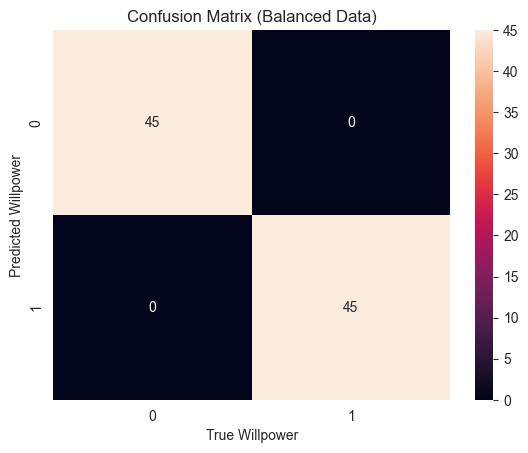


Positive coefficients increase log-odds of class: 1

Top 20 words predicting Willpower = 1 (largest positive coefficients):
      feature  coefficient
31        try     0.768608
35       keep     0.742834
12      didnt     0.735593
152        th     0.651081
82        bit     0.641169
48       goal     0.586024
52    focused     0.570569
1      better     0.565081
156       got     0.552200
42     saying     0.542973
59    problem     0.475154
142      well     0.465494
289    really     0.449762
228   already     0.431502
146  bobathan     0.418091
187   weekend     0.417337
55      could     0.413469
101      home     0.401055
279     candy     0.374266
623   collage     0.364739

Top 20 words most against Willpower = 1 (most negative coefficients):
      feature  coefficient
118     mylef    -0.404153
257   forward    -0.405458
79       good    -0.405546
519     sport    -0.433094
217    unsure    -0.433128
81       sure    -0.433153
54    outside    -0.439252
196   torcher    -0.4

In [41]:
# =====================================
# 0. Define labels and align with TF-IDF
# =====================================

# Original labels
y_raw = text_df_3_filtered['Performance Self-Talk (Approach/Avoidance)']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]

print("Class counts AFTER alignment:")
print(y.value_counts())

# =====================================
# 1. Build a balanced dataset
# =====================================

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

print("\nMinority class:", minority_class, "with", n_minority, "instances")
print("Majority class:", majority_class, "with", class_counts.max(), "instances")

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=1234  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

# =====================================
# 2. Train logistic regression
# =====================================

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# =====================================
# 3. Evaluation on balanced data
# =====================================

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# =====================================
# 4. Coefficients: words predicting 1
# =====================================

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]
print("\nPositive coefficients increase log-odds of class:", positive_class)

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Top words predicting the positive_class (usually Willpower = 1)
top_20_pos = coef_df_sorted.head(20)
print("\nTop 20 words predicting Willpower = {} (largest positive coefficients):"
      .format(positive_class))
print(top_20_pos)

# Strongest negative predictors (push away from positive_class)
top_20_neg = coef_df_sorted.tail(20)
print("\nTop 20 words most against Willpower = {} (most negative coefficients):"
      .format(positive_class))
print(top_20_neg)

# =====================================
# 5. Optional: side-by-side comparison
# =====================================

highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nSide-by-side comparison of top positive and negative predictors:")
print(coef_compare)


Effort

Class counts AFTER alignment:
Effort
0.0    392
1.0     44
Name: count, dtype: int64

Minority class: 1.0 with 44 instances
Majority class: 0.0 with 392 instances

Balanced class counts:
Effort
1.0    44
0.0    44
Name: count, dtype: int64

Classes in classifier: [0. 1.]

Logistic Regression Accuracy (Balanced Data): 0.9886363636363636
Logistic Regression Precision (Balanced Data): 0.9777777777777777
Logistic Regression Recall (Balanced Data): 1.0

Classification Report (Balanced Data):
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.98      1.00      0.99        44

    accuracy                           0.99        88
   macro avg       0.99      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88



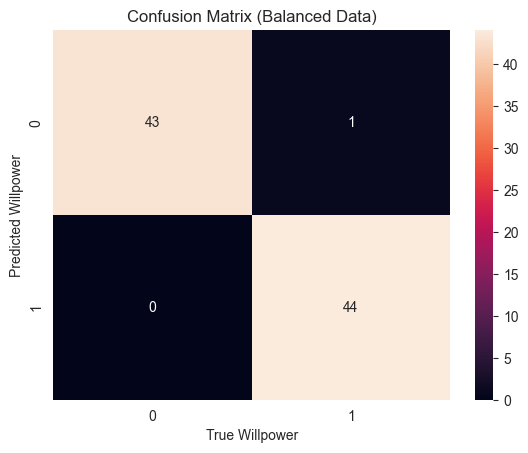


Positive coefficients increase log-odds of class: 1.0

Top 20 words predicting Willpower = 1.0 (largest positive coefficients):
       feature  coefficient
11        work     0.956253
303   somewhat     0.697159
116       know     0.666272
96     telling     0.663604
92       using     0.661293
186     wanted     0.606186
289     really     0.597631
311    knowlge     0.565265
84        said     0.506063
151  finishing     0.500461
325    keeping     0.485928
572    wroking     0.482216
255       zero     0.476632
206     closer     0.459018
441    mathias     0.459018
331    bunssss     0.442418
135         im     0.405275
270       tell     0.394503
129       jusr     0.386071
20        fail     0.366451

Top 20 words most against Willpower = 1.0 (most negative coefficients):
         feature  coefficient
9           help    -0.390383
79          good    -0.395091
43           way    -0.405070
199       solved    -0.410027
522      nothing    -0.410068
198     studying    -0.410078


In [42]:
# =====================================
# 0. Define labels and align with TF-IDF
# =====================================

# Original labels
y_raw = text_df_3_filtered['Effort']

# Make sure X (tfidf_df) and y share the same indices
valid_idx = tfidf_df.index.intersection(y_raw.index)

X = tfidf_df.loc[valid_idx]
y = y_raw.loc[valid_idx]

print("Class counts AFTER alignment:")
print(y.value_counts())

# =====================================
# 1. Build a balanced dataset
# =====================================

class_counts = y.value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

print("\nMinority class:", minority_class, "with", n_minority, "instances")
print("Majority class:", majority_class, "with", class_counts.max(), "instances")

# Indices for each class
minority_idx = y[y == minority_class].index
majority_idx_sampled = y[y == majority_class].sample(
    n=n_minority,
    random_state=1234  # reproducibility
).index

balanced_idx = minority_idx.union(majority_idx_sampled)

X_bal = X.loc[balanced_idx]
y_bal = y.loc[balanced_idx]

# Shuffle rows
X_bal, y_bal = shuffle(X_bal, y_bal, random_state=14312)

print("\nBalanced class counts:")
print(y_bal.value_counts())

# =====================================
# 2. Train logistic regression
# =====================================

bal_classifier = LogisticRegression(max_iter=1000)
bal_classifier.fit(X_bal, y_bal)

print("\nClasses in classifier:", bal_classifier.classes_)

# Predict on balanced data (for quick check)
predicted_bal = bal_classifier.predict(X_bal)

# =====================================
# 3. Evaluation on balanced data
# =====================================

print("\nLogistic Regression Accuracy (Balanced Data):",
      metrics.accuracy_score(y_bal, predicted_bal))
print("Logistic Regression Precision (Balanced Data):",
      metrics.precision_score(y_bal, predicted_bal))
print("Logistic Regression Recall (Balanced Data):",
      metrics.recall_score(y_bal, predicted_bal))

print("\nClassification Report (Balanced Data):\n",
      metrics.classification_report(y_bal, predicted_bal))

# Confusion matrix
cm_bal = metrics.confusion_matrix(y_bal, predicted_bal)

sns.heatmap(cm_bal, annot=True, fmt='d')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('True Willpower')
plt.ylabel('Predicted Willpower')
plt.show()

# =====================================
# 4. Coefficients: words predicting 1
# =====================================

# For binary classification in sklearn:
# bal_classifier.coef_[0] corresponds to the SECOND class in bal_classifier.classes_
positive_class = bal_classifier.classes_[1]
print("\nPositive coefficients increase log-odds of class:", positive_class)

coef = bal_classifier.coef_[0]         # shape: (n_features,)
feature_names = X_bal.columns          # TF-IDF feature names

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort descending: largest positive coefficients first
coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)

# Top words predicting the positive_class (usually Willpower = 1)
top_20_pos = coef_df_sorted.head(20)
print("\nTop 20 words predicting Willpower = {} (largest positive coefficients):"
      .format(positive_class))
print(top_20_pos)

# Strongest negative predictors (push away from positive_class)
top_20_neg = coef_df_sorted.tail(20)
print("\nTop 20 words most against Willpower = {} (most negative coefficients):"
      .format(positive_class))
print(top_20_neg)

# =====================================
# 5. Optional: side-by-side comparison
# =====================================

highest_20 = top_20_pos.reset_index(drop=True)
lowest_20 = top_20_neg.reset_index(drop=True)

highest_20.columns = [col + "_pos" for col in highest_20.columns]
lowest_20.columns = [col + "_neg" for col in lowest_20.columns]

coef_compare = pd.concat([highest_20, lowest_20], axis=1)

print("\nSide-by-side comparison of top positive and negative predictors:")
print(coef_compare)
